# CSIT456 Lab 6: Clustering
## Due date: April 24th, 2020

## Name:

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import pandas as pd

from sklearn import metrics
from sklearn.datasets import load_digits

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.neighbors import kneighbors_graph

from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])

## About MNIST dataset

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


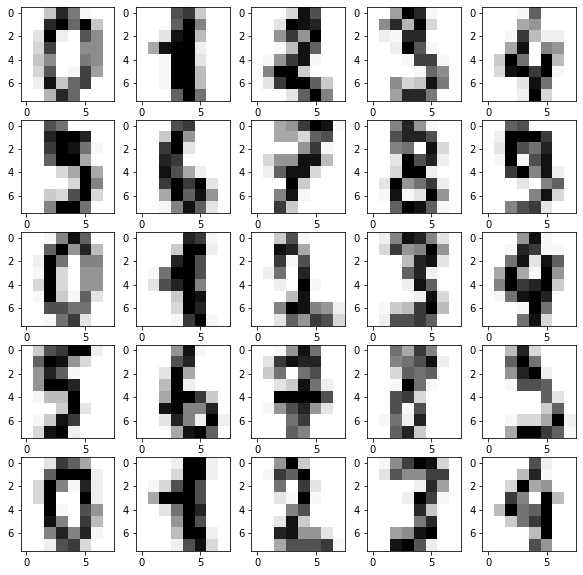

In [2]:
digits = load_digits()

X = digits.data
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for i in np.arange(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(np.reshape(X[i,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

## Question 1: k-means clustering
We first use k-means method to cluster the dataset and compute the Sihouette score for the clustering.
1. Create a k-means model called **kmeans_rand_model**. Set the number of clusters to be **n_digits** and 10 random selected initial centers. Train the models by the data set **X**.
2. Create a k-means model called **kmeans_plus_model**. Set the number of clusters to be **n_digits** and 10 initial centers selected by k-means++ algorithm. Train the models by the data set **X**.
3. Compute the average Sihouette score for **kmeans_rand_model**.
4. Compute the average Sihouette score for **kmeans_plus_model**.

In [3]:
kmeans_rand_model = KMeans(n_clusters=n_digits, n_init=10, init='random')
kmeans_rand_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
kmeans_plus_model = KMeans(n_clusters=n_digits, n_init=10, init='random')
kmeans_plus_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
cluster_labels = kmeans_rand_model.predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg) 

0.18239190594655763


In [6]:
cluster_labels = kmeans_plus_model.predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(silhouette_avg) 

0.18726220013473366


## Question 2 [10 points]: Hierarchical clustering
Use a hierarchical clustering method to cluster the dataset. Again, compute the average Silhouette score of it. 

*Hint:* Use the scikit-learn function **AgglomerativeClustering** and set **linkage** to be **ward**. 

In [7]:
ac_ward_model = AgglomerativeClustering(linkage='ward', affinity= 'euclidean', n_clusters = 10)
ac_ward_model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10)

In [8]:
print(silhouette_avg) 

0.18726220013473366


### Evaluating cluster quality with known ground-truth labels

1. [`homogeneity_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html): Homogeneity metric of a cluster labeling given a ground truth. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
+ [`completeness_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html): A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
+ [`v_measure_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html): The V-measure is the harmonic mean between homogeneity and completeness:
$$
v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
$$
+ [`homogeneity_completeness_v_measure`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html): Compute the homogeneity, completeness, and v-Measure scores at once.


In [9]:
from sklearn.metrics import homogeneity_score
# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_rand_model.labels_)

0.7379795198140187

## Question 3 [20 points] : Other clustering methods
AgglomerativeClustering supports ward, single, average, and complete linkage strategies.

Learn the following function. By modifying the following code, try to find the clustering method with the largest homogeneity score for this dataset. 

In [10]:
print (50 * '-')
print('% 25s' % 'method' +'      homo')
print (50 * '-')
def compare_method(estimator, name, data):

    estimator.fit(data)
    print('% 25s     %.3f ' % (name, metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="random", data=X)

# Write your code here
def evaluate_clustering(X, labels_true, labels):
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Normalized Mutual Information: %0.3f"
          % metrics.normalized_mutual_info_score(labels_true, labels))
    try:
        print("Silhouette Coefficient: %0.3f"
              % metrics.silhouette_score(X, labels))
    except ValueError:
        print("Silhouette Coefficient: None")

--------------------------------------------------
                   method      homo
--------------------------------------------------
                k-means++     0.737 
                   random     0.738 
